# Analisis Regresi : Boston Housing
_Exercise project_ implementasi Regresion Analysis menggunakan scikit-learn. Data diunduh dari situs [Kaggle](https://www.kaggle.com/vikrishnan/boston-house-prices).  
oleh: Teguh Satya  

mari berteman di [Github](https://www.github.com/kalehub)!

In [1]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Membaca dataset

In [2]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('DATASET/housing.csv', header=None, delimiter=r"\s+", names=columns)

__Keterangan kolom:__
* CRIM : Tingkat Kriminalitas
* ZN : Land zoned
* INDUS : Proporsi bisnis non-retail dalam kota
* CHAS : Variabel dummy Sungai Charles (1 jika saluran membatasi sungai; 0 sebaliknya)
* NOX : konsentrasi oksida nitrat (bagian per 10 juta)
* RM : rata-rata jumlah kamar per hunian
* Age : proporsi unit yang ditempati pemilik yang dibangun sebelum tahun 1940
* DIS : jarak tertimbang ke lima pusat kerja Boston
* RAD : indeks aksesibilitas ke jalan raya radial
* TAX : tarif pajak properti nilai penuh per \$10.000
* PIRATIO : rasio murid-guru menurut kota
* B: 1000(Bk - 0,63)^2 di mana Bk adalah proporsi orang kulit hitam menurut kota
* LSTAT : status penduduk yang lebih rendah
* MEDV : Nilai median rumah yang ditempati pemilik di \$1000's


## Melihat dataset

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Melihat informasi kolom dan tipe data pada dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## Melihat informasi statistik pada dataset

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Eksplorasi Data
Melihat informasi data dalam bentuk grafik. Hal pertama yang akan dilihat adalah distribusi data dalam atribut 'MEDV'

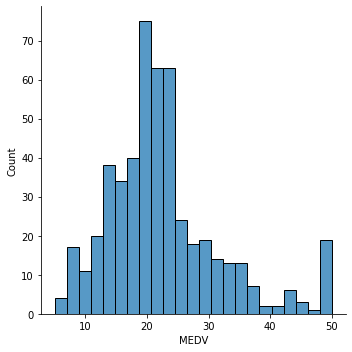

In [6]:
sns.displot(df['MEDV'])

dapat dilihat bahwa distribusi data dalam atribut 'MEDV' cukup normal dengan sedikit outliers.

<AxesSubplot:>

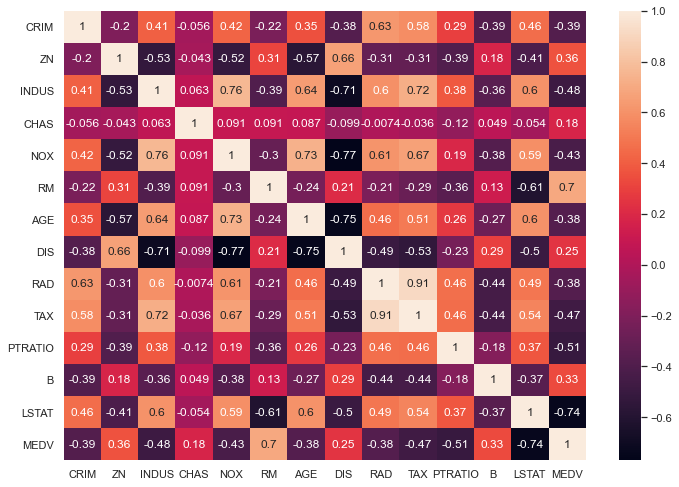

In [7]:
correlation_mat = df.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(correlation_mat,annot=True)

Korelasi antar atribut digambarkan dalam bentuk heatmap. Semakin "panas" korelasi antar atribut (yang dalam hal ini berwarna lebih cerah) maka semakin kuat juga nilai korelasinya secara positif. Agar proses identifikasi korelasi antar atribut dapat dilakukan dengan mudah dalam heatmap, ditambahkan angka sebagai notasi heatmap tersebut. Semakin dekat dengan angka 1, maka semakin kuat pula korelasi antar atributnya.  

Dari heatmap diatas dapat dilihat bahwa **RM merupakan atribut yang memiliki korelasi positif terbesar terhadap atribut MEDV** sementara **LSTAT merupakan atribut yang memiliki korelasi negatif terbesar terhadap MEDV**

## Melihat pengaruh atribut RM dan LSTAT dengan atribut MEDV

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

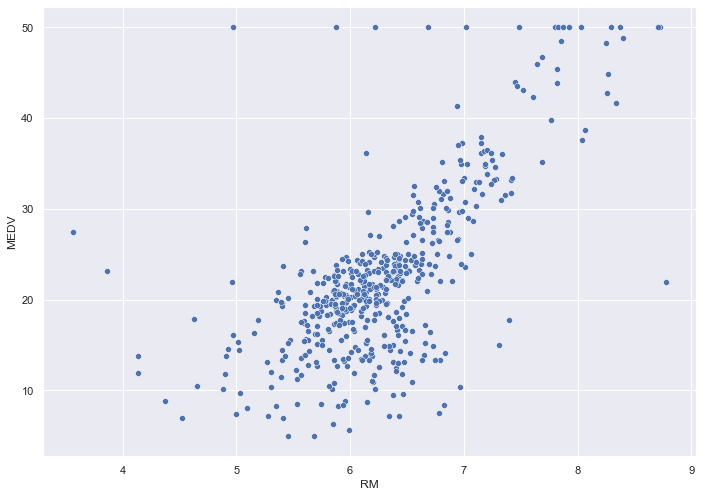

In [8]:
sns.scatterplot(x=df['RM'], y=df['MEDV'],data=df)

Dapat dilihat dalam grafik scatter diatas bahwa :  

__Semakin banyak rata-rata kamar hunian (atribut RM) maka semakin tinggi pula harga rumah tersebut (atribut MEDV)__

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

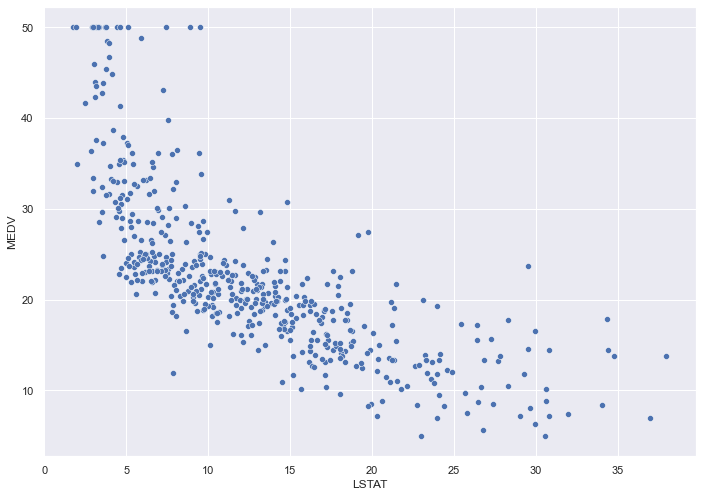

In [9]:
sns.scatterplot(x=df['LSTAT'], y=df['MEDV'],data=df)

Dapat dilihat dalam grafik scatter diatas bahwa :  

__Semakin tinggi nilai atribut LSTAT maka harga rumah (MEDV) akan semakin rendah)__

## Pemodelan Data
Untuk memulai pemodelan, data akan diseleksi berdasarkan atribut yang telah dipilih untuk digunakan. Dalam kasus ini, atribut yang digunakan adalah RM dan LSTAT sesuai dengan hasil _correlation matrix_

In [10]:
X = df[['RM', 'LSTAT']]
X

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33
...,...,...
501,6.593,9.67
502,6.120,9.08
503,6.976,5.64
504,6.794,6.48


In [11]:
y = df['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

## Membagi dataset menjadi _Data Training_ dan _Data Testing_
Data dibagi menjadi data training dan data testing. Pada langkah ini, data training akan diambil secara random sebanyak 70% dari dataset, sedangkan data testing akan diambil sebanyak 30%

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

## Pemodelan

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Membuat prediksi

In [14]:
pred = model.predict(X_test)
pred

array([36.28025974, 31.31680311, 20.34064595, 20.05835222, 29.43750447,
       30.65251222, 39.10360656, 10.70436236, 30.86911757,  8.98397456,
       27.78794289, 14.57407209, 19.19660171, 23.80576252, 23.73075217,
       19.60513187,  8.42966025, 31.3370199 , 28.00835296, 26.7059072 ,
       12.457809  , 18.49829828, 24.42204789, 31.64746687, 32.5127574 ,
       21.19959532, 27.5343067 , 21.22640793, 23.03040155, 31.03733045,
       23.9221402 , 20.72892183, 34.23426113, 36.37490772, 24.33305207,
       21.76518637, 19.81800748, 21.14376569,  6.38780592, 28.37378822,
       21.65744167, 25.54103204, 35.62144121, 12.72538325, 18.95905058,
       25.96931217, 30.75252021, 17.86202082, 27.5968919 , 29.28672731,
       32.69884285, 38.91436803, 19.2949121 , 21.65548439, 32.36795189,
       -4.60173762, 18.64832651, 16.26705808, 17.90276397, 18.81977485,
       31.85346453,  1.87870551, 13.48720801, 21.95029568, 12.68857962,
       26.61684894, 24.05655771, 19.85754479, 17.92519771, 20.33

## Scatter Plot hasil prediksi
_Scatter Plot_ ditampilkan untuk memastikan bahwa hasil prediksi terdistribusi dengan normal

Text(0, 0.5, 'Nilai Prediksi')

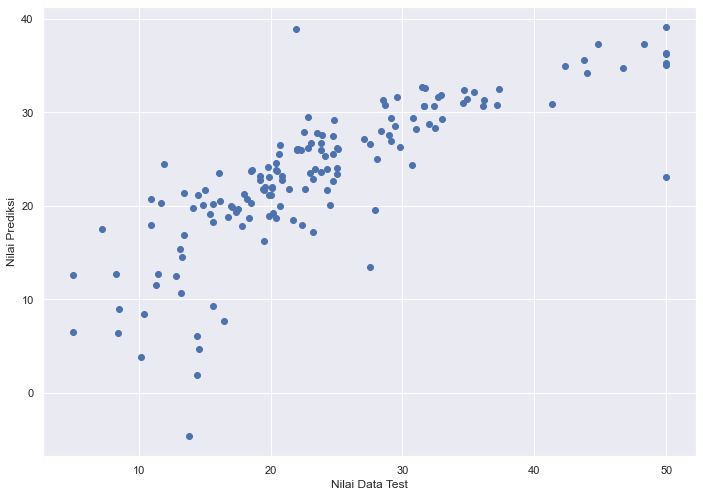

In [23]:
plt.scatter(y_test, pred)
plt.xlabel('Nilai Data Test')
plt.ylabel('Nilai Prediksi')


Dari grafik tersebut dapat dilihat bahwa data telah terdistribusi dengan normal secara positif

## Evaluasi Model
Pengevaluasian model regresi dengan menggunakan MAE,MSE dan RMSE

In [24]:
from sklearn import metrics
print('***Hasil evaluasi Matriks***')
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

***Hasil evaluasi Matriks***
MAE: 4.380474756133433
MSE: 36.54113133122373
RMSE: 6.044926081535136
